In [1]:
# # Do not forget to check if your notebook log collection plugin is working
# from mining_extension import check_logging
# check_logging("PASTE FULL URL HERE")

# Import data

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv("C:\\Users\\Jyothi Krishna Gudi\\jupyter-notebook-hackathon\\jupyter-notebook-hackathon\\jetnet_logs.txt",header=None,sep="james")

C:\Users\Jyothi Krishna Gudi\AppData\Local\Temp\ipykernel_16116\3932456785.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("C:\\Users\\Jyothi Krishna Gudi\\jupyter-notebook-hackathon\\jupyter-notebook-hackathon\\jetnet_logs.txt",header=None,sep="james")


# Data sanity check

In [4]:
df["a_counter"] = df[0].str.count('@')

In [5]:
df["a_counter"].value_counts()

a_counter
1    86814
2      376
3        2
Name: count, dtype: int64

### We see 376 lines with 2 sessions and 2 lines with 3 sessions each

In [6]:
df_clean = df[df.a_counter==1].copy()
df_2users = df[df.a_counter==2].copy()
df_3users = df[df.a_counter==3].copy()

# Data massaging

In [7]:
delimiter="@"

In [9]:
df_2users[0]

224      @User115: Action_7 (29/09/19 | 16:31:55) -> Ac...
255      @User73: Action_7 (20/09/20 | 00:40:05) -> Act...
344      @User41: Action_4 (23/04/21 | 21:16:50) --> Ac...
387      @User67: Action_6 (07/03/21 | 18:12:32) -> Act...
656      @User103: Action_9 (08/07/21 | 14:09:49) -> Ac...
                               ...                        
85385    @User2: Action_3 (09/09/21 | 15:27:15) -> Acti...
85685    @User121: Action_4 (19/12/19 | 16:51:22) -> Ac...
86193    @User127: Action_7 (10/11/19 | 19:20:58) --> A...
86328    @User81: Action_10 (09/07/21 | 14:56:41) -> Ac...
86500    @User134: Action_6 (13/05/20 | 23:08:46) -> Ac...
Name: 0, Length: 376, dtype: object

In [ ]:
df2_clean = df_2users[0].str.split(delimiter, expand=True).copy()

In [ ]:
df3_clean = df_3users[0].str.split(delimiter, expand=True).copy()

In [ ]:
df1_clean = df_clean[0].str.split(delimiter, expand=True).copy()

In [13]:
df3_clean

,0,1,2,3
51883,,User134: Action_3 (03/08/20 | 22:37:46) --> Ac...,User67: Action_0 (08/11/19 | 00:34:33) -> Acti...,User112: Action_7 (04/07/21 | 21:43:11) -> Act...
57098,,User75: Action_3 (05/04/20 | 14:34:23) -> Acti...,User0: Action_7 (13/04/21 | 14:41:41) --> Acti...,User137: Action_7 (27/05/20 | 13:36:31) -> Act...


In [14]:
df = pd.concat([df1_clean[1],df2_clean[1],df2_clean[2],df3_clean[1],df3_clean[2],df3_clean[3]])

In [15]:
df = df.reset_index()

In [16]:
df

,index,0
0,0,User92: Action_3 (15/10/19 | 18:08:02) -> Acti...
1,1,User140: Action_3 (15/05/20 | 15:37:04) -> Act...
2,2,User105: Action_4 (25/04/20 | 01:08:29) -> Act...
3,3,User127: Action_1 (20/06/20 | 00:24:48) -> Act...
4,4,User50: Action_4 (09/10/19 | 15:12:52) --> Act...
...,...,...
87567,57098,User75: Action_3 (05/04/20 | 14:34:23) -> Acti...
87568,51883,User67: Action_0 (08/11/19 | 00:34:33) -> Acti...
87569,57098,User0: Action_7 (13/04/21 | 14:41:41) --> Acti...
87570,51883,User112: Action_7 (04/07/21 | 21:43:11) -> Act...


In [17]:
df[0].str.split(": ",expand=True)

,0,1
0,User92,Action_3 (15/10/19 | 18:08:02) -> Action_1 (15...
1,User140,Action_3 (15/05/20 | 15:37:04) -> Action_8 (15...
2,User105,Action_4 (25/04/20 | 01:08:29) -> Action_7 (25...
3,User127,Action_1 (20/06/20 | 00:24:48) -> Action_2 (20...
4,User50,Action_4 (09/10/19 | 15:12:52) --> Action_8 (0...
...,...,...
87567,User75,Action_3 (05/04/20 | 14:34:23) -> Action_8 (05...
87568,User67,Action_0 (08/11/19 | 00:34:33) -> Action_8 (08...
87569,User0,Action_7 (13/04/21 | 14:41:41) --> Action_2 (1...
87570,User112,Action_7 (04/07/21 | 21:43:11) -> Action_4 (04...


In [18]:
df.columns =['index',"value"]

In [19]:
df_1=pd.merge(df,df["value"].str.split(": ",expand=True),left_index=True, right_index=True)

In [20]:
df_1["ss"] = df_1[1].str.split("->",expand=True)[0].str.split("(",expand=True)[1].str.split(")",expand=True)[0]

In [21]:
df_1

,index,value,0,1,ss
0,0,User92: Action_3 (15/10/19 | 18:08:02) -> Acti...,User92,Action_3 (15/10/19 | 18:08:02) -> Action_1 (15...,15/10/19 | 18:08:02
1,1,User140: Action_3 (15/05/20 | 15:37:04) -> Act...,User140,Action_3 (15/05/20 | 15:37:04) -> Action_8 (15...,15/05/20 | 15:37:04
2,2,User105: Action_4 (25/04/20 | 01:08:29) -> Act...,User105,Action_4 (25/04/20 | 01:08:29) -> Action_7 (25...,25/04/20 | 01:08:29
3,3,User127: Action_1 (20/06/20 | 00:24:48) -> Act...,User127,Action_1 (20/06/20 | 00:24:48) -> Action_2 (20...,20/06/20 | 00:24:48
4,4,User50: Action_4 (09/10/19 | 15:12:52) --> Act...,User50,Action_4 (09/10/19 | 15:12:52) --> Action_8 (0...,09/10/19 | 15:12:52
...,...,...,...,...,...
87567,57098,User75: Action_3 (05/04/20 | 14:34:23) -> Acti...,User75,Action_3 (05/04/20 | 14:34:23) -> Action_8 (05...,05/04/20 | 14:34:23
87568,51883,User67: Action_0 (08/11/19 | 00:34:33) -> Acti...,User67,Action_0 (08/11/19 | 00:34:33) -> Action_8 (08...,08/11/19 | 00:34:33
87569,57098,User0: Action_7 (13/04/21 | 14:41:41) --> Acti...,User0,Action_7 (13/04/21 | 14:41:41) --> Action_2 (1...,13/04/21 | 14:41:41
87570,51883,User112: Action_7 (04/07/21 | 21:43:11) -> Act...,User112,Action_7 (04/07/21 | 21:43:11) -> Action_4 (04...,04/07/21 | 21:43:11


In [22]:
df_1 = df_1[~df_1[1].isna()]

In [23]:
df_1

,index,value,0,1,ss
0,0,User92: Action_3 (15/10/19 | 18:08:02) -> Acti...,User92,Action_3 (15/10/19 | 18:08:02) -> Action_1 (15...,15/10/19 | 18:08:02
1,1,User140: Action_3 (15/05/20 | 15:37:04) -> Act...,User140,Action_3 (15/05/20 | 15:37:04) -> Action_8 (15...,15/05/20 | 15:37:04
2,2,User105: Action_4 (25/04/20 | 01:08:29) -> Act...,User105,Action_4 (25/04/20 | 01:08:29) -> Action_7 (25...,25/04/20 | 01:08:29
3,3,User127: Action_1 (20/06/20 | 00:24:48) -> Act...,User127,Action_1 (20/06/20 | 00:24:48) -> Action_2 (20...,20/06/20 | 00:24:48
4,4,User50: Action_4 (09/10/19 | 15:12:52) --> Act...,User50,Action_4 (09/10/19 | 15:12:52) --> Action_8 (0...,09/10/19 | 15:12:52
...,...,...,...,...,...
87567,57098,User75: Action_3 (05/04/20 | 14:34:23) -> Acti...,User75,Action_3 (05/04/20 | 14:34:23) -> Action_8 (05...,05/04/20 | 14:34:23
87568,51883,User67: Action_0 (08/11/19 | 00:34:33) -> Acti...,User67,Action_0 (08/11/19 | 00:34:33) -> Action_8 (08...,08/11/19 | 00:34:33
87569,57098,User0: Action_7 (13/04/21 | 14:41:41) --> Acti...,User0,Action_7 (13/04/21 | 14:41:41) --> Action_2 (1...,13/04/21 | 14:41:41
87570,51883,User112: Action_7 (04/07/21 | 21:43:11) -> Act...,User112,Action_7 (04/07/21 | 21:43:11) -> Action_4 (04...,04/07/21 | 21:43:11


In [24]:
df_1['none'] = df_1.ss.isna()

C:\Users\Jyothi Krishna Gudi\AppData\Local\Temp\ipykernel_16116\3822369549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['none'] = df_1.ss.isna()


In [25]:
df_1

,index,value,0,1,ss,none
0,0,User92: Action_3 (15/10/19 | 18:08:02) -> Acti...,User92,Action_3 (15/10/19 | 18:08:02) -> Action_1 (15...,15/10/19 | 18:08:02,False
1,1,User140: Action_3 (15/05/20 | 15:37:04) -> Act...,User140,Action_3 (15/05/20 | 15:37:04) -> Action_8 (15...,15/05/20 | 15:37:04,False
2,2,User105: Action_4 (25/04/20 | 01:08:29) -> Act...,User105,Action_4 (25/04/20 | 01:08:29) -> Action_7 (25...,25/04/20 | 01:08:29,False
3,3,User127: Action_1 (20/06/20 | 00:24:48) -> Act...,User127,Action_1 (20/06/20 | 00:24:48) -> Action_2 (20...,20/06/20 | 00:24:48,False
4,4,User50: Action_4 (09/10/19 | 15:12:52) --> Act...,User50,Action_4 (09/10/19 | 15:12:52) --> Action_8 (0...,09/10/19 | 15:12:52,False
...,...,...,...,...,...,...
87567,57098,User75: Action_3 (05/04/20 | 14:34:23) -> Acti...,User75,Action_3 (05/04/20 | 14:34:23) -> Action_8 (05...,05/04/20 | 14:34:23,False
87568,51883,User67: Action_0 (08/11/19 | 00:34:33) -> Acti...,User67,Action_0 (08/11/19 | 00:34:33) -> Action_8 (08...,08/11/19 | 00:34:33,False
87569,57098,User0: Action_7 (13/04/21 | 14:41:41) --> Acti...,User0,Action_7 (13/04/21 | 14:41:41) --> Action_2 (1...,13/04/21 | 14:41:41,False
87570,51883,User112: Action_7 (04/07/21 | 21:43:11) -> Act...,User112,Action_7 (04/07/21 | 21:43:11) -> Action_4 (04...,04/07/21 | 21:43:11,False


In [26]:
 df_1["ss_mew"] = df_1[1].str.split(")",expand=True)[0].str[-19:]

C:\Users\Jyothi Krishna Gudi\AppData\Local\Temp\ipykernel_16116\3587997540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["ss_mew"] = df_1[1].str.split(")",expand=True)[0].str[-19:]


In [27]:
df_1[~(df_1.ss==df_1.ss_mew)]

,index,value,0,1,ss,none,ss_mew
174,174,User122: Action_6 (null) -> Action_7 (03/01/20...,User122,Action_6 (null) -> Action_7 (03/01/20 | 00:23:...,null,False,Action_6 (null
546,550,User139: Action_3 24/04/21 | 23:38:23) -> Acti...,User139,Action_3 24/04/21 | 23:38:23) -> Action_4 (25/...,None,True,24/04/21 | 23:38:23
1363,1370,User7: Action_1 19/12/19 | 23:43:32) -> Action...,User7,Action_1 19/12/19 | 23:43:32) -> Action_7 (19/...,None,True,19/12/19 | 23:43:32
1388,1395,User115: Action_7 06/01/21 | 21:06:14) -> Acti...,User115,Action_7 06/01/21 | 21:06:14) -> Action_9 (06/...,None,True,06/01/21 | 21:06:14
1691,1699,User3: Action_1 17/11/19 | 19:40:10) -> Action...,User3,Action_1 17/11/19 | 19:40:10) -> Action_3 (17/...,None,True,17/11/19 | 19:40:10
...,...,...,...,...,...,...,...
86941,28588,User80:,User80,,None,True,
87383,44938,User120: Action_8 10/06/20 | 16:57:44) -> Acti...,User120,Action_8 10/06/20 | 16:57:44) -> Action_10 (10...,None,True,10/06/20 | 16:57:44
87416,51592,User77: Action_7 31/03/20 | 00:38:22) --> Acti...,User77,Action_7 31/03/20 | 00:38:22) --> Action_3 (31...,None,True,31/03/20 | 00:38:22
87546,82785,User30: Action_1 09/08/21 | 13:36:50) --> Acti...,User30,Action_1 09/08/21 | 13:36:50) --> Action_4 (09...,None,True,09/08/21 | 13:36:50


In [28]:
for k in range(df_1.shape[1]):
    if df_1.ss[k]==None:
        df_1.ss[k]=df_1.ss_mew[k]

In [29]:
df_1 = df_1[~df_1.ss.isna()]

In [30]:
df_1 = df_1[df_1.ss!="null"]

In [31]:
import datetime

In [32]:
df_1["time"] = df_1.ss.apply(lambda x: datetime.datetime.strptime(x,"%d/%m/%y | %H:%M:%S") )

In [33]:
df_1=df_1.sort_values("time")

In [34]:
df_1

,index,value,0,1,ss,none,ss_mew,time
40478,40654,User122: Action_7 (20/09/19 | 13:44:16) -> END...,User122,Action_7 (20/09/19 | 13:44:16) -> END (20/09/1...,20/09/19 | 13:44:16,False,20/09/19 | 13:44:16,2019-09-20 13:44:16
32030,32168,User103: Action_7 (20/09/19 | 13:45:07) -> Act...,User103,Action_7 (20/09/19 | 13:45:07) -> Action_7 (20...,20/09/19 | 13:45:07,False,20/09/19 | 13:45:07,2019-09-20 13:45:07
61835,62106,User118: Action_3 (20/09/19 | 13:59:04) -> Act...,User118,Action_3 (20/09/19 | 13:59:04) -> Action_7 (20...,20/09/19 | 13:59:04,False,20/09/19 | 13:59:04,2019-09-20 13:59:04
63152,63426,User81: Action_10 (20/09/19 | 14:08:06) -> Act...,User81,Action_10 (20/09/19 | 14:08:06) -> Action_10 (...,20/09/19 | 14:08:06,False,20/09/19 | 14:08:06,2019-09-20 14:08:06
31815,31953,User50: Action_7 (20/09/19 | 14:31:04) -> Acti...,User50,Action_7 (20/09/19 | 14:31:04) -> Action_6 (20...,20/09/19 | 14:31:04,False,20/09/19 | 14:31:04,2019-09-20 14:31:04
...,...,...,...,...,...,...,...,...
759,764,User84: Action_4 (19/09/21 | 01:23:21) -> Acti...,User84,Action_4 (19/09/21 | 01:23:21) -> Action_1 (19...,19/09/21 | 01:23:21,False,19/09/21 | 01:23:21,2021-09-19 01:23:21
84625,84997,User136: Action_3 (19/09/21 | 01:32:03) -> Act...,User136,Action_3 (19/09/21 | 01:32:03) -> Action_4 (19...,19/09/21 | 01:32:03,False,19/09/21 | 01:32:03,2021-09-19 01:32:03
48686,48904,User116: Action_9 (19/09/21 | 01:35:38) -> Act...,User116,Action_9 (19/09/21 | 01:35:38) -> Action_7 (19...,19/09/21 | 01:35:38,False,19/09/21 | 01:35:38,2021-09-19 01:35:38
77856,78192,User50: Action_10 (19/09/21 | 01:46:08) -> Act...,User50,Action_10 (19/09/21 | 01:46:08) -> Action_10 (...,19/09/21 | 01:46:08,False,19/09/21 | 01:46:08,2021-09-19 01:46:08


In [35]:
df_1["session_id"] = range(df_1.shape[0])

In [36]:
df_1

,index,value,0,1,ss,none,ss_mew,time,session_id
40478,40654,User122: Action_7 (20/09/19 | 13:44:16) -> END...,User122,Action_7 (20/09/19 | 13:44:16) -> END (20/09/1...,20/09/19 | 13:44:16,False,20/09/19 | 13:44:16,2019-09-20 13:44:16,0
32030,32168,User103: Action_7 (20/09/19 | 13:45:07) -> Act...,User103,Action_7 (20/09/19 | 13:45:07) -> Action_7 (20...,20/09/19 | 13:45:07,False,20/09/19 | 13:45:07,2019-09-20 13:45:07,1
61835,62106,User118: Action_3 (20/09/19 | 13:59:04) -> Act...,User118,Action_3 (20/09/19 | 13:59:04) -> Action_7 (20...,20/09/19 | 13:59:04,False,20/09/19 | 13:59:04,2019-09-20 13:59:04,2
63152,63426,User81: Action_10 (20/09/19 | 14:08:06) -> Act...,User81,Action_10 (20/09/19 | 14:08:06) -> Action_10 (...,20/09/19 | 14:08:06,False,20/09/19 | 14:08:06,2019-09-20 14:08:06,3
31815,31953,User50: Action_7 (20/09/19 | 14:31:04) -> Acti...,User50,Action_7 (20/09/19 | 14:31:04) -> Action_6 (20...,20/09/19 | 14:31:04,False,20/09/19 | 14:31:04,2019-09-20 14:31:04,4
...,...,...,...,...,...,...,...,...,...
759,764,User84: Action_4 (19/09/21 | 01:23:21) -> Acti...,User84,Action_4 (19/09/21 | 01:23:21) -> Action_1 (19...,19/09/21 | 01:23:21,False,19/09/21 | 01:23:21,2021-09-19 01:23:21,87253
84625,84997,User136: Action_3 (19/09/21 | 01:32:03) -> Act...,User136,Action_3 (19/09/21 | 01:32:03) -> Action_4 (19...,19/09/21 | 01:32:03,False,19/09/21 | 01:32:03,2021-09-19 01:32:03,87254
48686,48904,User116: Action_9 (19/09/21 | 01:35:38) -> Act...,User116,Action_9 (19/09/21 | 01:35:38) -> Action_7 (19...,19/09/21 | 01:35:38,False,19/09/21 | 01:35:38,2021-09-19 01:35:38,87255
77856,78192,User50: Action_10 (19/09/21 | 01:46:08) -> Act...,User50,Action_10 (19/09/21 | 01:46:08) -> Action_10 (...,19/09/21 | 01:46:08,False,19/09/21 | 01:46:08,2021-09-19 01:46:08,87256


In [37]:
temp = df_1[1].str.split("->",expand=True)

In [38]:
for k in temp.columns:
    temp[k] = temp[k]+"|"+df_1[0].astype("str")+"|"+df_1['session_id'].astype("str")

In [39]:
imperfect_cell = temp.unstack().reset_index(drop=True)

In [40]:
imp_c = pd.DataFrame(imperfect_cell)

In [41]:
imp_c = imp_c[~imp_c[0].isna()]

In [42]:
imp_c

,0
0,Action_7 (20/09/19 | 13:44:16) |User122|0
1,Action_7 (20/09/19 | 13:45:07) |User103|1
2,Action_3 (20/09/19 | 13:59:04) |User118|2
3,Action_10 (20/09/19 | 14:08:06) |User81|3
4,Action_7 (20/09/19 | 14:31:04) |User50|4
...,...
5899001,Action_8 (04/12/20 | 08:20:23) |User25|52715
5986259,Action_10 (04/12/20 | 08:45:49) |User25|52715
6073517,Action_3 (04/12/20 | 08:30:53) |User25|52715
6160775,Action_3 (04/12/20 | 08:16:37) |User25|52715


In [43]:
simp_c=imp_c[0].str.split(")",expand=True)

In [44]:
simp_c

,0,1
0,Action_7 (20/09/19 | 13:44:16,|User122|0
1,Action_7 (20/09/19 | 13:45:07,|User103|1
2,Action_3 (20/09/19 | 13:59:04,|User118|2
3,Action_10 (20/09/19 | 14:08:06,|User81|3
4,Action_7 (20/09/19 | 14:31:04,|User50|4
...,...,...
5899001,Action_8 (04/12/20 | 08:20:23,|User25|52715
5986259,Action_10 (04/12/20 | 08:45:49,|User25|52715
6073517,Action_3 (04/12/20 | 08:30:53,|User25|52715
6160775,Action_3 (04/12/20 | 08:16:37,|User25|52715


In [45]:
simp_c[1].isna().sum()

8673

In [46]:
simp_c=simp_c[~simp_c[1].isna()]

In [47]:
simp_c

,0,1
0,Action_7 (20/09/19 | 13:44:16,|User122|0
1,Action_7 (20/09/19 | 13:45:07,|User103|1
2,Action_3 (20/09/19 | 13:59:04,|User118|2
3,Action_10 (20/09/19 | 14:08:06,|User81|3
4,Action_7 (20/09/19 | 14:31:04,|User50|4
...,...,...
5899001,Action_8 (04/12/20 | 08:20:23,|User25|52715
5986259,Action_10 (04/12/20 | 08:45:49,|User25|52715
6073517,Action_3 (04/12/20 | 08:30:53,|User25|52715
6160775,Action_3 (04/12/20 | 08:16:37,|User25|52715


In [48]:
tsimp = pd.DataFrame(simp_c[0].str[-19:])

In [49]:
tsimp["action_name"] = simp_c[0].str[:-20]

In [50]:
tsimp[["user_id","session_num"]]=simp_c[1].str.split("|",expand=True)[[1,2]]

In [54]:
tsimp.columns = ["action_time", 'action_name', 'user_id', 'session_num']

In [55]:
tsimp = tsimp[['user_id','session_num',"action_time", 'action_name']]

In [56]:
tsimp.action_time.value_counts().head(20)

action_time
 Action_7 (null        455
 Action_3 (null        301
 Action_4 (null        257
 Action_10 (null       225
 Action_0 (null        164
 Action_6 (null        137
 Action_1 (null        125
 Action_8 (null        110
 Action_9 (null         75
 END (null              72
 Action_5 (null         29
 Action_2 (null         19
17/09/20 | 00:11:21      4
01/01/20 | 03:44:04      4
31/01/20 | 00:02:47      4
03/01/20 | 00:24:14      4
30/04/20 | 00:39:20      4
19/07/21 | 22:14:15      4
10/11/20 | 19:32:41      4
01/07/20 | 04:43:33      4
Name: count, dtype: int64

In [58]:
tsimp

,user_id,session_num,action_time,action_name
1971,User134,12302,01/01/20 | 00:00:17,Action_7
1972,User3,12303,01/01/20 | 00:00:45,Action_8
1973,User129,12211,01/01/20 | 00:00:52,Action_1
1974,User129,12211,01/01/20 | 00:01:01,Action_8
1975,User11,12254,01/01/20 | 00:01:15,Action_0
...,...,...,...,...
2048725,User11,56105,31/12/20 | 23:57:22,Action_9
2048726,User2,56100,31/12/20 | 23:57:46,Action_7
2048727,User33,56128,31/12/20 | 23:58:05,Action_7
2048728,User122,56087,31/12/20 | 23:58:48,Action_10


### The final cleaned dataset with the required columns

In [57]:
tsimp=tsimp.sort_values("action_time").reset_index(drop = True).loc[1971:]

In [59]:
tsimp.action_name=tsimp.action_name.str.replace(" ","")

In [60]:
tsimp.reset_index(drop=True,inplace=True)

In [61]:
tsimp[~tsimp.action_name.isin(["END"])].action_name.count()

1968283

In [68]:
tsimp.action_time = tsimp.action_time.apply(lambda x : datetime.datetime.strptime(x,"%d/%m/%y | %H:%M:%S"))

# Metrics

- Mean actions count per user overall (6 points),
- Mean actions by user in a day (6 points),
- The probability of repeating the same action three times in a row during one session (6 points)
- The 0.95 quantile of distribution of time delta between the actions of the same type distribution during one session 
  (6 points).
- Is there statistical difference of activity in different days of the week? And between weekends and workdays? (6
  points)

* Mean actions count per user overall (6 points),

# Total active users

In [69]:
tsimp.user_id.nunique()

143

In [70]:
tsimp.action_name.value_counts()

action_name
Action_7     464202
Action_3     311941
Action_4     256634
Action_10    250853
Action_0     154026
Action_1     145330
Action_6     142481
Action_8     122134
END           78476
Action_9      74106
Action_5      26471
Action_2      19047
null           1058
Name: count, dtype: int64

In [ ]:
total_actions = tsimp[~tsimp.action_name.isin(["END"])].action_name.count()

# Average actions per user

In [71]:
total_actions/tsimp.user_id.nunique()

13764.216783216783

- Mean actions by user in a day (6 points),

In [72]:
type(tsimp.action_time[1])

pandas._libs.tslibs.timestamps.Timestamp

# Number of unique days

In [73]:
tsimp.action_time.dt.date.nunique()

732

In [74]:
tsimp[~tsimp.action_name.isin(["END"])].action_name.count()/(tsimp.user_id.nunique()*tsimp.action_time.dt.date.nunique())

18.803574840460087

The probability of repeating the same action three times in a row during one session (6 points)

In [75]:
tsimp.sort_values(["session_num","action_time"]).head(40)

,user_id,session_num,action_time,action_name
1320277,User122,0,2019-09-20 13:44:16,Action_7
1320279,User122,0,2019-09-20 13:56:51,END
1320278,User103,1,2019-09-20 13:45:07,Action_7
1320284,User103,1,2019-09-20 14:27:15,Action_4
1320285,User103,1,2019-09-20 14:27:19,Action_4
1320286,User103,1,2019-09-20 14:28:28,Action_7
1320334,User103,1,2019-09-20 16:05:39,Action_9
1320344,User103,1,2019-09-20 16:19:19,Action_1
1320359,User103,1,2019-09-20 16:39:26,Action_4
1320406,User103,1,2019-09-20 17:46:51,Action_4


In [ ]:
flag = [for i in temptastic.action_name]

In [78]:
temptastic = tsimp[~tsimp.action_name.isin(["END","null"])]

In [79]:
temptastic = temptastic.sort_values(["session_num","action_time"]).reset_index(drop=True)

In [80]:
temp_sess1=0
temp_sess2=0
temp_action1 = "act"
temp_action2 = "act"
counter = 0
for k in range(temptastic.shape[0]):
    if temp_sess2 == temp_sess1:
        #print("h")
        if temp_sess1 == temptastic.session_num[k]:
         #   print("i")
            if temp_action2 == temp_action1:
          #      print("j")
                if temp_action1 == temptastic.action_name[k]:
           #         print("k")
                    counter+=1
    temp_action2 = temp_action1    
    temp_action1 = temptastic.action_name[k]
    temp_sess2 = temp_sess1       
    temp_sess1 =temptastic.session_num[k]
    

In [83]:
counter

41221

In [86]:
tot=temptastic.groupby("session_num")["action_name"].count()

In [91]:
base = tot[tot>=3].sum() - len(tot[tot>=3])*2

In [93]:
counter/base *100

2.2961863731719245

The 0.95 quantile of distribution of time delta between the actions of the same type distribution during one session 

In [102]:
temp_sess1=0
temp_action1 = "act"
delta=[]
counter = 0
for k in range(temptastic.shape[0]):
    if temp_sess1 == temptastic.session_num[k]:
         #   print("i")
          #      print("j")
                if temp_action1 == temptastic.action_name[k]:
           #         print("k")
                    delta.append((temptastic.action_time[k]-temp_time).total_seconds())  
    temp_action1 = temptastic.action_name[k]
    temp_sess1 =temptastic.session_num[k]
    temp_time = temptastic.action_time[k]
    

In [104]:
np.percentile(delta, 95)

4164.0

In [105]:
4164/60

69.4

In [99]:
(temptastic.action_time[3]-temptastic.action_time[2]).total_seconds()

4.0

In [95]:
temptastic.sort_values(["session_num","action_name","action_time"]).reset_index(drop=True)

,user_id,session_num,action_time,action_name
0,User122,0,2019-09-20 13:44:16,Action_7
1,User103,1,2019-09-21 01:19:47,Action_0
2,User103,1,2019-09-20 16:19:19,Action_1
3,User103,1,2019-09-20 23:44:09,Action_1
4,User103,1,2019-09-20 19:55:04,Action_10
...,...,...,...,...
1967220,User131,9999,2019-12-12 19:07:47,Action_7
1967221,User131,9999,2019-12-12 20:22:35,Action_7
1967222,User131,9999,2019-12-12 21:37:57,Action_7
1967223,User131,9999,2019-12-12 16:51:47,Action_8


In [112]:
temptastic["wk_flag"]=temptastic.action_time.dt.dayofweek

In [137]:
overall_mean = temptastic['user_id'].count()/temptastic.day.nunique()

In [138]:
std_dev = (temptastic.groupby("wk_flag").count()['user_id']/temptastic.groupby("wk_flag").day.nunique()).std()

In [139]:
(temptastic.groupby("wk_flag").count()['user_id']/temptastic.groupby("wk_flag").day.nunique()-overall_mean)/std_dev

wk_flag
0   -2.086690
1    0.336587
2    1.016247
3    0.093409
4   -0.205964
5    0.628335
6    0.231849
dtype: float64

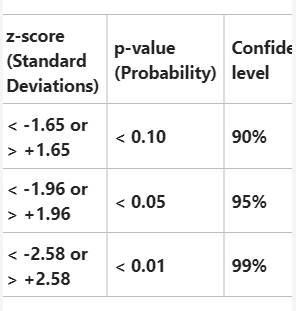

As the z score is above -2 for monday, there is considerable difference between days

In [141]:
temptastic["wkend_flag"]=temptastic.action_time.dt.dayofweek>4

In [142]:
temptastic

,user_id,session_num,action_time,action_name,wk_flag,day,wkend_flag
0,User122,0,2019-09-20 13:44:16,Action_7,False,2019-09-20,False
1,User103,1,2019-09-20 13:45:07,Action_7,False,2019-09-20,False
2,User103,1,2019-09-20 14:27:15,Action_4,False,2019-09-20,False
3,User103,1,2019-09-20 14:27:19,Action_4,False,2019-09-20,False
4,User103,1,2019-09-20 14:28:28,Action_7,False,2019-09-20,False
...,...,...,...,...,...,...,...
1967220,User131,9999,2019-12-12 22:06:18,Action_10,False,2019-12-12,False
1967221,User131,9999,2019-12-12 22:34:40,Action_2,False,2019-12-12,False
1967222,User131,9999,2019-12-12 22:56:03,Action_6,False,2019-12-12,False
1967223,User131,9999,2019-12-12 23:45:12,Action_2,False,2019-12-12,False


In [143]:
(temptastic.groupby("wkend_flag").count()['user_id']/temptastic.groupby("wkend_flag").day.nunique()-overall_mean)/std_dev

wkend_flag
False   -0.173026
True     0.430092
dtype: float64

There is no statistically significant difference between weekends and weekdays

# Data Visualization 

In [161]:
grap=temptastic.groupby(["day","action_name"])["wkend_flag"].count().reset_index()

In [164]:
grap

,day,action_name,wkend_flag
0,2019-09-20,Action_0,57
1,2019-09-20,Action_1,78
2,2019-09-20,Action_10,117
3,2019-09-20,Action_2,7
4,2019-09-20,Action_3,166
...,...,...,...
8038,2021-09-19,Action_7,468
8039,2021-09-19,Action_8,118
8040,2021-09-19,Action_9,72
8041,2021-09-20,Action_0,1


In [154]:
import seaborn as sns

# Count of different actions by days

<Axes: xlabel='day', ylabel='wkend_flag'>

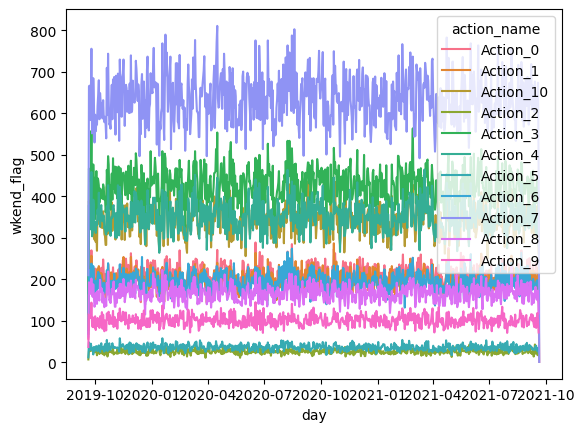

In [162]:
sns.lineplot(x='day', y='wkend_flag', hue="action_name",data=grap)

In [165]:
grap2 = temptastic.groupby(["action_name"])["wkend_flag"].count().reset_index()

# Count of actions

<Axes: xlabel='action_name', ylabel='count'>

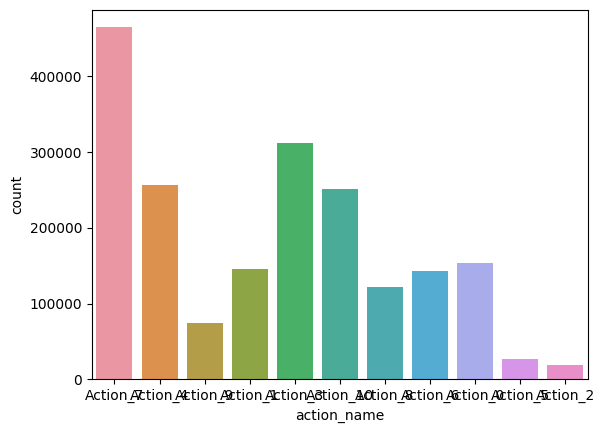

In [167]:
sns.countplot(x='action_name', data=temptastic)

In [174]:
top = temptastic.groupby("user_id").action_name.count().reset_index().sort_values("action_name",ascending=False)

In [176]:
143*0.2

28.6

In [179]:
top20=temptastic[temptastic.user_id.isin(top.reset_index(drop=True)['user_id'][:29])]

In [180]:
grap2=top20.groupby(["day","action_name"])["wkend_flag"].count().reset_index()

In [181]:
grap2

,day,action_name,wkend_flag
0,2019-09-20,Action_0,17
1,2019-09-20,Action_1,22
2,2019-09-20,Action_10,37
3,2019-09-20,Action_2,2
4,2019-09-20,Action_3,55
...,...,...,...
8038,2021-09-19,Action_7,196
8039,2021-09-19,Action_8,54
8040,2021-09-19,Action_9,32
8041,2021-09-20,Action_0,1


# Top 20% active users by days

<Axes: xlabel='day', ylabel='wkend_flag'>

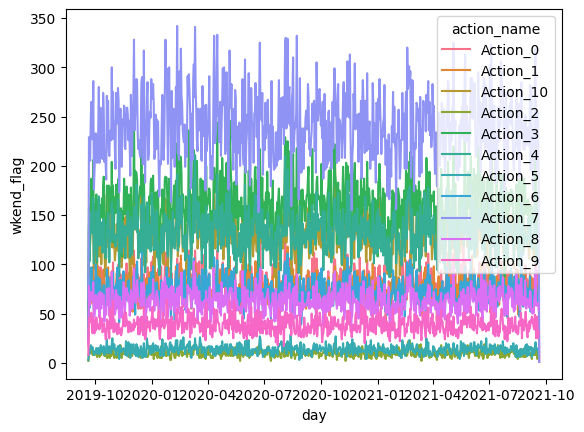

In [182]:
sns.lineplot(x='day', y='wkend_flag', hue="action_name",data=grap2)

In [118]:
temptastic["day"] = temptastic.action_time.dt.date

In [120]:
temptastic.groupby("wk_flag").day.nunique()

wk_flag
0    105
1    104
2    104
3    104
4    105
5    105
6    105
Name: day, dtype: int64

In [ ]:
temptastic[""]

29.497230226158347

In [132]:
import scipy.stats as stats

In [133]:
stats.zscore?

In [131]:
pip install scipy

     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB 1.4 MB/s eta 0:00:31
     --------------------------------------- 0.1/42.2 MB 660.6 kB/s eta 0:01:04
     --------------------------------------- 0.1/42.2 MB 751.6 kB/s eta 0:00:57
     --------------------------------------- 0.1/42.2 MB 804.6 kB/s eta 0:00:53
     --------------------------------------- 0.2/42.2 MB 892.5 kB/s eta 0:00:48
     --------------------------------------- 0.3/42.2 MB 983.0 kB/s eta 0:00:43
     ---------------------------------------- 0.3/42.2 MB 1.0 MB/s eta 0:00:41
     ---------------------------------------- 0.4/42.2 MB 1.1 MB/s eta 0:00:38
     ---------------------------------------- 0.5/42.2 MB 1.1 MB/s eta 0:00:38
     ---------------------------------------- 0.5/42.2 MB 1.1 MB/s eta 0:00:38
      --------------------------------------- 0.6/42.2 MB 1.1 MB/s eta 0:00:38
      --------------------------------------- 0.6/42.2